# NFL Data Analysis
An examination of data from 23,000 NFL running plays 


In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


nfl = pd.read_csv('../nfl.csv')

/Users/wmchale/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [205]:
nfl.shape

(509762, 49)

In [3]:
nfl.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,2.017090e+13,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,2.017090e+13,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,2.017090e+13,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,2.017090e+13,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,2.017090e+13,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


# Initial data cleaning and EDA. 
The data originally contained a row for each player on the field for each play. I created a new dataframe just with the information on the player carrying the ball. 

In [4]:
nfl['test'] = nfl['NflId'] - nfl['NflIdRusher']

In [5]:
nfl.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'test'],
      dtype='object')

In [6]:
nfl.dtypes

GameId                      int64
PlayId                    float64
Team                       object
X                         float64
Y                         float64
S                         float64
A                         float64
Dis                       float64
Orientation               float64
Dir                       float64
NflId                       int64
DisplayName                object
JerseyNumber                int64
Season                      int64
YardLine                    int64
Quarter                     int64
GameClock                  object
PossessionTeam             object
Down                        int64
Distance                    int64
FieldPosition              object
HomeScoreBeforePlay         int64
VisitorScoreBeforePlay      int64
NflIdRusher                 int64
OffenseFormation           object
OffensePersonnel           object
DefendersInTheBox         float64
DefensePersonnel           object
PlayDirection              object
TimeHandoff   

In [7]:
nfl = nfl[nfl['test'] == 0]

In [8]:
nfl.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,test
18,2017090700,2.017090e+13,home,78.75,30.53,3.63,3.35,0.38,161.98,245.74,...,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,0
40,2017090700,2.017090e+13,home,71.07,27.16,3.06,2.41,0.34,210.70,312.20,...,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,0
62,2017090700,2.017090e+13,home,48.66,19.11,5.77,2.42,0.60,140.82,221.96,...,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,0
84,2017090700,2.017090e+13,home,15.53,25.36,4.45,3.20,0.46,186.22,275.44,...,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,0
98,2017090700,2.017090e+13,away,29.99,27.12,3.90,2.53,0.44,34.27,157.92,...,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,0


In [9]:
nfl.shape

(23171, 50)

In [11]:
nfl.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'test'],
      dtype='object')

Creating a column to show the score differential

In [12]:
nfl['home_team_lead'] = nfl['HomeScoreBeforePlay'] - nfl['VisitorScoreBeforePlay']

In [13]:
nfl.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,test,home_team_lead
18,2017090700,2.017090e+13,home,78.75,30.53,3.63,3.35,0.38,161.98,245.74,...,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,0,0
40,2017090700,2.017090e+13,home,71.07,27.16,3.06,2.41,0.34,210.70,312.20,...,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,0,0
62,2017090700,2.017090e+13,home,48.66,19.11,5.77,2.42,0.60,140.82,221.96,...,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,0,0
84,2017090700,2.017090e+13,home,15.53,25.36,4.45,3.20,0.46,186.22,275.44,...,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,0,0
98,2017090700,2.017090e+13,away,29.99,27.12,3.90,2.53,0.44,34.27,157.92,...,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,0,7


Dropping a number of columns which I deemed to have little relevance to the analysis and model 

In [14]:
columns_to_drop = ['GameId', 'PlayId', 'PlayerBirthDate', 'PlayerCollegeName', 'test', 'FieldPosition',
                   'X', 'Y', 'StadiumType', 'WindDirection', 'WindSpeed','GameWeather',
                  'Orientation', 'Dir', 'TimeHandoff', 'TimeSnap']

In [15]:
nfl = nfl.drop(columns_to_drop, axis=1)

In [16]:
nfl.columns

Index(['Team', 'S', 'A', 'Dis', 'NflId', 'DisplayName', 'JerseyNumber',
       'Season', 'YardLine', 'Quarter', 'GameClock', 'PossessionTeam', 'Down',
       'Distance', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'Yards',
       'PlayerHeight', 'PlayerWeight', 'Position', 'HomeTeamAbbr',
       'VisitorTeamAbbr', 'Week', 'Stadium', 'Location', 'Turf', 'Temperature',
       'Humidity', 'home_team_lead'],
      dtype='object')

Offense Formation refers how the offensive is aligned before the snap of the ball. 

In [17]:
nfl.OffenseFormation.value_counts()

SINGLEBACK    10247
SHOTGUN        6862
I_FORM         4821
PISTOL          610
JUMBO           521
WILDCAT          81
EMPTY            23
ACE               1
Name: OffenseFormation, dtype: int64

In [18]:
nfl.OffensePersonnel.value_counts()

1 RB, 1 TE, 3 WR               10589
1 RB, 2 TE, 2 WR                5186
2 RB, 1 TE, 2 WR                2438
1 RB, 3 TE, 1 WR                1423
2 RB, 2 TE, 1 WR                1174
6 OL, 1 RB, 2 TE, 1 WR           440
6 OL, 1 RB, 1 TE, 2 WR           383
6 OL, 2 RB, 1 TE, 1 WR           268
6 OL, 2 RB, 2 TE, 0 WR           171
2 RB, 0 TE, 3 WR                 157
1 RB, 2 TE, 1 WR,1 DL            141
6 OL, 1 RB, 0 TE, 3 WR            99
1 RB, 0 TE, 4 WR                  85
0 RB, 1 TE, 4 WR                  76
2 QB, 1 RB, 1 TE, 2 WR            71
2 RB, 3 TE, 0 WR                  64
6 OL, 1 RB, 3 TE, 0 WR            55
6 OL, 2 RB, 0 TE, 2 WR            48
1 RB, 1 TE, 2 WR,1 DL             34
7 OL, 1 RB, 0 TE, 2 WR            31
3 RB, 1 TE, 1 WR                  26
2 QB, 2 RB, 1 TE, 1 WR            25
1 RB, 3 TE, 0 WR,1 DL             20
6 OL, 1 RB, 2 TE, 0 WR,1 DL       16
3 RB, 0 TE, 2 WR                  13
2 QB, 1 RB, 2 TE, 1 WR            12
6 OL, 1 RB, 2 TE, 0 WR,1 LB       11
7

Offense Personel refers to the types of players that the offense has on the field. The original data includes a mix of different categories. I standardize the categories to a two digit number: the first digit refers to how many running backs on the field and the second number refers to how many tight ends are on the field

In [19]:
off_pers = {'1 RB, 1 TE, 3 WR':'11', '1 RB, 2 TE, 2 WR': '12', '2 RB, 1 TE, 2 WR':'21', '1 RB, 3 TE, 1 WR':'13',
           '2 RB, 2 TE, 1 WR':'22', '6 OL, 1 RB, 2 TE, 1 WR':'12', 
            '6 OL, 1 RB, 1 TE, 2 WR':'11', '6 OL, 2 RB, 1 TE, 1 WR':'21',
          '6 OL, 2 RB, 2 TE, 0 WR':'22', '2 RB, 0 TE, 3 WR':'20', '1 RB, 2 TE, 1 WR,1 DL':'12', '3 RB, 0 TE, 2 WR':'30',
            '1 RB, 0 TE, 4 WR':'10',
            '0 RB, 1 TE, 4 WR':'01',
            '2 QB, 1 RB, 1 TE, 2 WR':'11'
           }


nfl['OffensePersonnel'] = nfl['OffensePersonnel'].map(off_pers)

In [20]:
nfl.OffensePersonnel.value_counts()

11    11043
12     5767
21     2706
13     1423
22     1345
20      157
10       85
01       76
30       13
Name: OffensePersonnel, dtype: int64

In [21]:
#Filling remaining Offensive pers group with most commonly occuring. 

nfl.OffensePersonnel.fillna('11', inplace= True)

In [24]:
nfl.DefensePersonnel.value_counts()

4 DL, 2 LB, 5 DB          6358
4 DL, 3 LB, 4 DB          6205
3 DL, 4 LB, 4 DB          3656
2 DL, 4 LB, 5 DB          2588
3 DL, 3 LB, 5 DB          2222
2 DL, 3 LB, 6 DB           529
4 DL, 1 LB, 6 DB           418
4 DL, 4 LB, 3 DB           237
3 DL, 2 LB, 6 DB           193
5 DL, 2 LB, 4 DB           161
5 DL, 3 LB, 3 DB           108
1 DL, 4 LB, 6 DB            65
3 DL, 5 LB, 3 DB            64
6 DL, 4 LB, 1 DB            56
5 DL, 4 LB, 2 DB            53
6 DL, 3 LB, 2 DB            47
5 DL, 1 LB, 5 DB            41
6 DL, 2 LB, 3 DB            32
1 DL, 5 LB, 5 DB            31
2 DL, 5 LB, 4 DB            22
2 DL, 2 LB, 7 DB            13
1 DL, 3 LB, 7 DB            13
3 DL, 1 LB, 7 DB            12
5 DL, 3 LB, 2 DB, 1 OL       7
5 DL, 5 LB, 1 DB             7
0 DL, 5 LB, 6 DB             6
4 DL, 5 LB, 2 DB             5
0 DL, 4 LB, 7 DB             4
2 DL, 4 LB, 4 DB, 1 OL       3
5 DL, 4 LB, 1 DB, 1 OL       3
4 DL, 0 LB, 7 DB             3
0 DL, 6 LB, 5 DB             2
4 DL, 6 

Defense Personnel refers to the number of players of each position that the defense has on the field. The original data has 38 different groupings. Similar to what I did with the offense, I group defense personnel groups into the most commonly occuring with the first number representing the number of defensive lineman, second number referring to the number of linebackers, and third number referring to the number of defensive backs

In [25]:
def_pers = {'4 DL, 2 LB, 5 DB':'4-2-5', '4 DL, 3 LB, 4 DB': '4-3-4', '3 DL, 4 LB, 4 DB': '3-4-4', 
            '2 DL, 4 LB, 5 DB':'2-4-5', '3 DL, 3 LB, 5 DB':'3-3-5', '2 DL, 3 LB, 6 DB':'2-3-6', '4 DL, 1 LB, 6 DB':'4-1-6', 
           '4 DL, 4 LB, 3 DB':'4-4-3', '3 DL, 2 LB, 6 DB': '3-2-6', '5 DL, 2 LB, 4 DB':'5-2-4', '5 DL, 3 LB, 3 DB':'5-3-3'}


nfl['DefensePersonnel'] = nfl['DefensePersonnel'].map(def_pers)

In [26]:
nfl.DefensePersonnel.value_counts()

4-2-5    6358
4-3-4    6205
3-4-4    3656
2-4-5    2588
3-3-5    2222
2-3-6     529
4-1-6     418
4-4-3     237
3-2-6     193
5-2-4     161
5-3-3     108
Name: DefensePersonnel, dtype: int64

In [27]:
nfl.DefensePersonnel.fillna('4-2-5', inplace= True)
#Filling remaining defense personnel with most common '4-2-5 defense'

Standardizing the different types of turf into just natural and artificial

In [28]:
Turf = {'Field Turf':'Artificial', 'A-Turf Titan':'Artificial', 'Grass':'Natural', 'UBU Sports Speed S5-M':'Artificial', 'Artificial':'Artificial', 'DD GrassMaster':'Artificial', 'Natural Grass':'Natural', 'UBU Speed Series-S5-M':'Artificial', 'FieldTurf':'Artificial', 'FieldTurf 360':'Artificial', 'Natural grass':'Natural', 'grass':'Natural', 'Natural':'Natural', 'Artifical':'Artificial', 'FieldTurf360':'Artificial', 'Naturall Grass':'Natural', 'Field turf':'Artificial', 'SISGrass':'Artificial', 'Twenty-Four/Seven Turf':'Artificial', 'natural grass':'Natural'} 

nfl['Turf'] = nfl['Turf'].map(Turf)

In [29]:
nfl.isnull().sum()

Team                         0
S                            0
A                            0
Dis                          0
NflId                        0
DisplayName                  0
JerseyNumber                 0
Season                       0
YardLine                     0
Quarter                      0
GameClock                    0
PossessionTeam               0
Down                         0
Distance                     0
HomeScoreBeforePlay          0
VisitorScoreBeforePlay       0
NflIdRusher                  0
OffenseFormation             5
OffensePersonnel             0
DefendersInTheBox            3
DefensePersonnel             0
PlayDirection                0
Yards                        0
PlayerHeight                 0
PlayerWeight                 0
Position                     0
HomeTeamAbbr                 0
VisitorTeamAbbr              0
Week                         0
Stadium                      0
Location                     0
Turf                         0
Temperat

A few columns have missing data. Since it is a small amount of plays relative to the total dataset, I think it is appropriate to fill the categorical missing entries with the most commonly occuring entry and for the numerical columns, I fill with an average. 

In [30]:
nfl.DefendersInTheBox.value_counts()

7.0     9478
6.0     6933
8.0     4971
5.0      684
9.0      611
10.0     187
11.0     166
4.0      118
3.0       18
1.0        1
2.0        1
Name: DefendersInTheBox, dtype: int64

In [31]:
nfl.DefendersInTheBox.fillna(7, inplace = True)

In [32]:
nfl.OffenseFormation.fillna('SINGLEBACK', inplace = True)

In [33]:
nfl.Temperature.fillna(nfl.Temperature.mean(), inplace = True)
#Filling missing temperature valeus with average temp

In [34]:
nfl.Humidity.fillna(nfl.Humidity.mean(), inplace = True)
#Filling missing humidity values with average humidty

In [35]:
nfl.isnull().sum()

Team                      0
S                         0
A                         0
Dis                       0
NflId                     0
DisplayName               0
JerseyNumber              0
Season                    0
YardLine                  0
Quarter                   0
GameClock                 0
PossessionTeam            0
Down                      0
Distance                  0
HomeScoreBeforePlay       0
VisitorScoreBeforePlay    0
NflIdRusher               0
OffenseFormation          0
OffensePersonnel          0
DefendersInTheBox         0
DefensePersonnel          0
PlayDirection             0
Yards                     0
PlayerHeight              0
PlayerWeight              0
Position                  0
HomeTeamAbbr              0
VisitorTeamAbbr           0
Week                      0
Stadium                   0
Location                  0
Turf                      0
Temperature               0
Humidity                  0
home_team_lead            0
dtype: int64

## Visualizing the data

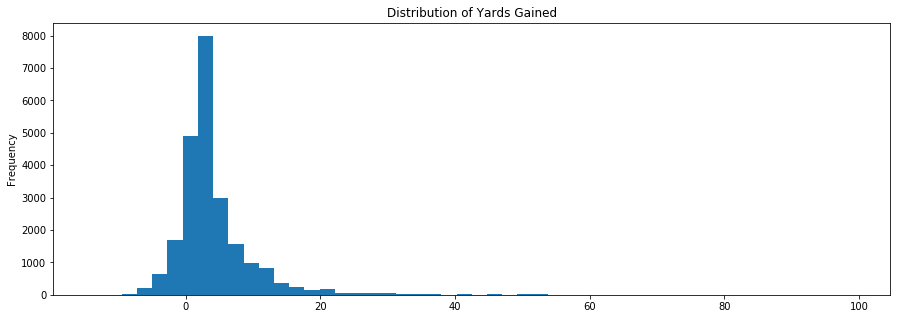

In [36]:
nfl['Yards'] \
    .plot(kind='hist',
          figsize=(15, 5),
          bins=50,
          title='Distribution of Yards Gained')
plt.show()



Yards gained is clustered around 4-5 yards

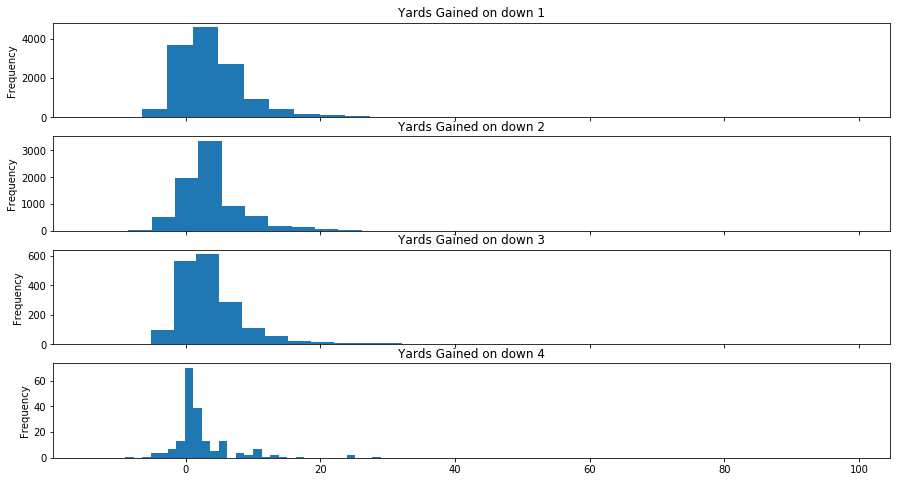

In [37]:
fig, axes = plt.subplots(4, 1, figsize=(15, 8), sharex=True)
n = 0
for i, d in nfl.groupby('Down'):
    d['Yards'].plot(kind='hist',
                    bins=30,
                   
                   ax=axes[n],
                   title=f'Yards Gained on down {i}')
    n+=1

Yards gained by down shows the widest distribution on 1st down.

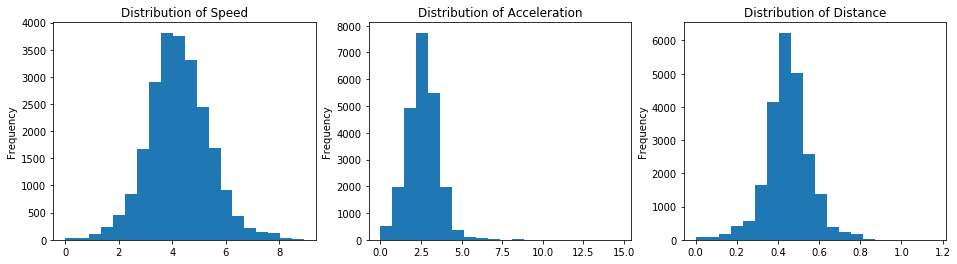

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
nfl['S'].plot(kind='hist', ax=ax1,
                title='Distribution of Speed',
                bins=20,
                )
nfl['A'].plot(kind='hist',
                ax=ax2,
                title='Distribution of Acceleration',
                bins=20,
                )
nfl['Dis'].plot(kind='hist',
                  ax=ax3,
                  title='Distribution of Distance',
                  bins=20,
                  )
plt.show()

/Users/wmchale/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


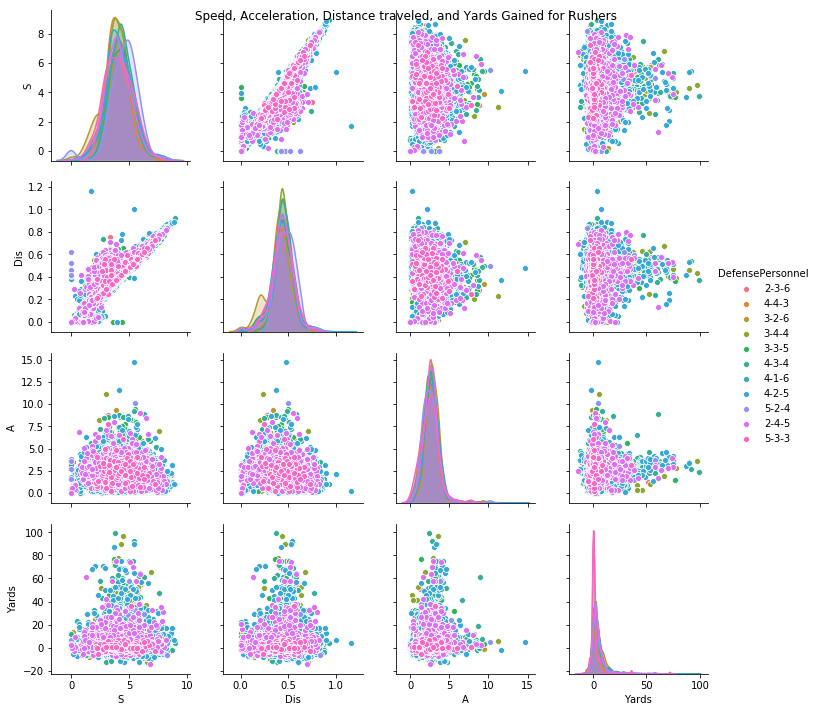

In [39]:

sns.pairplot(nfl[['S','Dis','A','Yards','DefensePersonnel']],
            hue='DefensePersonnel')
plt.suptitle('Speed, Acceleration, Distance traveled, and Yards Gained for Rushers')
plt.show()

In [42]:
nfl.groupby('OffenseFormation').Yards.describe()

,count,mean,std,min,25%,50%,75%,max
OffenseFormation,,,,,,,,
ACE,1.0,4.000000,NaN,4.0,4.0,4.0,4.0,4.0
EMPTY,23.0,5.043478,5.803434,-5.0,3.0,5.0,6.0,21.0
I_FORM,4821.0,4.022402,6.551639,-12.0,1.0,3.0,5.0,75.0
JUMBO,521.0,1.756238,5.526517,-6.0,0.0,1.0,2.0,90.0
PISTOL,610.0,4.298361,5.545409,-8.0,1.0,3.0,6.0,43.0
SHOTGUN,6862.0,4.508161,6.085829,-12.0,1.0,3.0,6.0,87.0
SINGLEBACK,10252.0,4.221420,6.685964,-14.0,1.0,3.0,6.0,99.0
WILDCAT,81.0,4.222222,4.034229,-4.0,2.0,3.0,6.0,16.0


/Users/wmchale/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


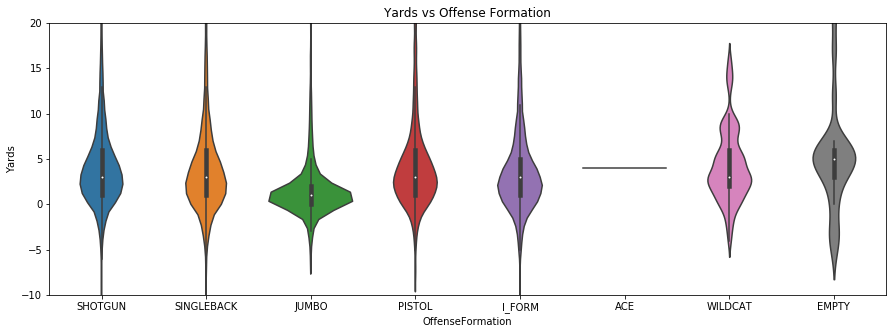

In [206]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(x='OffenseFormation',
               y='Yards',
               data=nfl,
               ax=ax)
plt.ylim(-10, 20)
plt.title('Yards vs Offense Formation')
plt.show()

In [45]:
nfl.groupby('OffensePersonnel').Yards.describe()


,count,mean,std,min,25%,50%,75%,max
OffensePersonnel,,,,,,,,
01,76.0,3.947368,6.474349,-5.0,1.0,3.0,6.0,43.0
10,85.0,5.388235,8.630089,-8.0,2.0,4.0,6.0,74.0
11,11599.0,4.446159,6.379071,-14.0,1.0,3.0,6.0,90.0
12,5767.0,3.955610,6.225565,-12.0,1.0,3.0,5.0,97.0
13,1423.0,3.564301,6.489409,-9.0,1.0,2.0,5.0,99.0
20,157.0,4.280255,6.852694,-7.0,1.0,3.0,5.0,53.0
21,2706.0,4.313378,6.894297,-12.0,1.0,3.0,6.0,75.0
22,1345.0,3.727881,6.502655,-6.0,1.0,2.0,5.0,90.0
30,13.0,2.538462,4.858247,-3.0,1.0,2.0,3.0,15.0


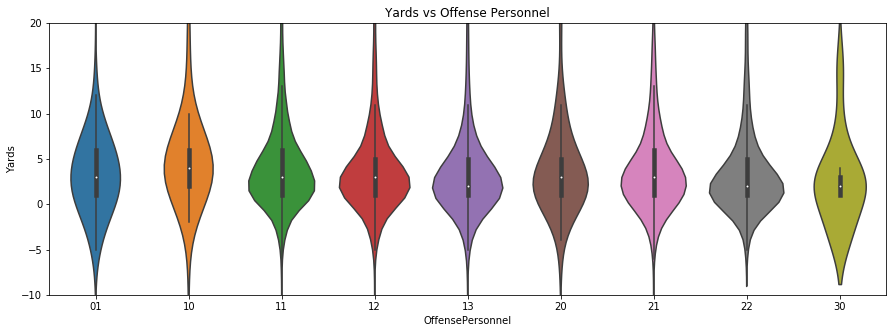

In [47]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(x='OffensePersonnel',
               y='Yards',
               data=nfl,
               ax=ax)
plt.ylim(-10, 20)
plt.title('Yards vs Offense Personnel')
plt.show()

In [48]:

nfl.groupby('DefensePersonnel').Yards.describe()


,count,mean,std,min,25%,50%,75%,max
DefensePersonnel,,,,,,,,
2-3-6,529.0,4.977316,6.292692,-6.0,1.0,4.0,7.0,54.0
2-4-5,2588.0,4.413060,5.996180,-14.0,1.0,3.0,6.0,75.0
3-2-6,193.0,5.321244,5.254008,-5.0,2.0,4.0,8.0,25.0
3-3-5,2222.0,4.509001,6.034619,-10.0,1.0,3.0,6.0,77.0
3-4-4,3656.0,3.900438,6.371271,-12.0,1.0,3.0,5.0,97.0
4-1-6,418.0,5.198565,6.901590,-5.0,1.0,3.0,7.0,57.0
4-2-5,6854.0,4.416837,6.718844,-12.0,1.0,3.0,6.0,90.0
4-3-4,6205.0,3.938598,6.460309,-12.0,1.0,3.0,5.0,99.0
4-4-3,237.0,1.957806,5.905893,-6.0,0.0,1.0,2.0,72.0


/Users/wmchale/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


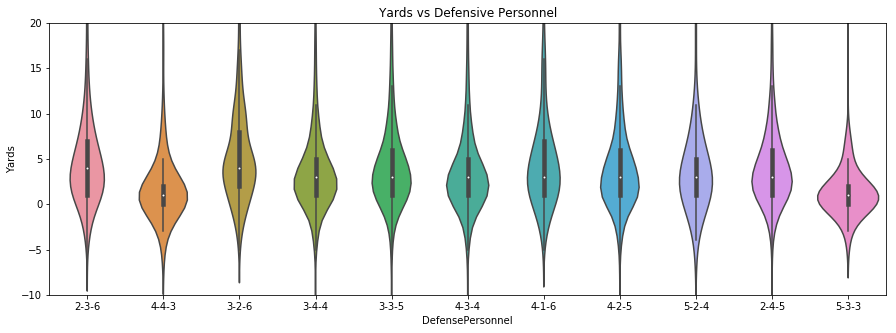

In [49]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(x='DefensePersonnel',
               y='Yards',
               data=nfl,
               ax=ax)
plt.ylim(-10, 20)
plt.title('Yards vs Defensive Personnel')
plt.show()

In [50]:
nfl.groupby('Quarter').Yards.describe()

#Average running play in the 4th quarter gains fewer yards than previous 3 quarters.

,count,mean,std,min,25%,50%,75%,max
Quarter,,,,,,,,
1,6003.0,4.137431,6.052442,-12.0,1.0,3.0,6.0,87.0
2,5565.0,4.359748,6.691945,-11.0,1.0,3.0,6.0,99.0
3,5683.0,4.377793,6.773266,-14.0,1.0,3.0,6.0,92.0
4,5747.0,3.969723,6.169673,-10.0,1.0,3.0,5.0,90.0
5,173.0,4.693642,7.895673,-11.0,1.0,2.0,7.0,53.0


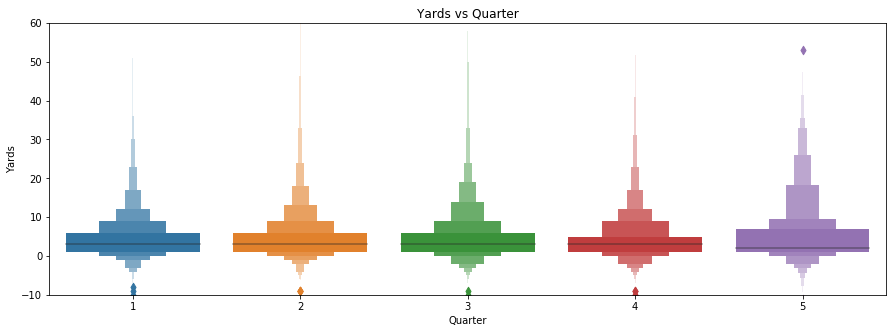

In [51]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_ylim(-10, 60)
ax.set_title('Yards vs Quarter')
sns.boxenplot(x='Quarter',
            y='Yards',
            data=nfl,
            ax=ax)
plt.show()

In [52]:
nfl.groupby('Down').Yards.describe()
#Teams gained the most yards on average on first down


,count,mean,std,min,25%,50%,75%,max
Down,,,,,,,,
1,13303.0,4.303541,6.466063,-14.0,1.0,3.0,6.0,99.0
2,7863.0,4.133537,6.290150,-12.0,1.0,3.0,6.0,92.0
3,1814.0,4.091510,6.944854,-12.0,1.0,2.0,5.0,90.0
4,191.0,2.251309,4.730604,-9.0,0.0,1.0,3.0,29.0


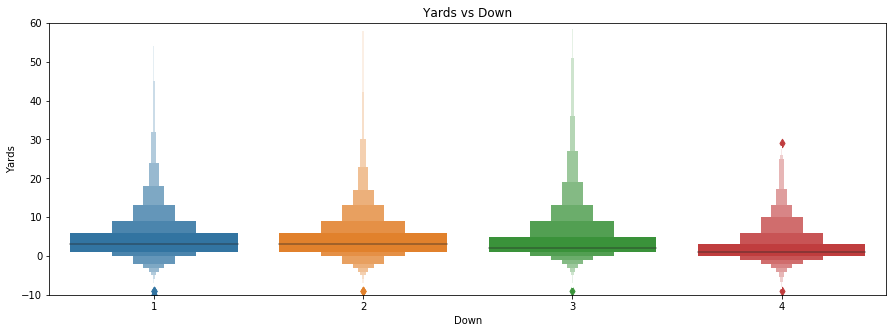

In [53]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_ylim(-10, 60)
ax.set_title('Yards vs Down')
sns.boxenplot(x='Down',
            y='Yards',
            data=nfl,
            ax=ax)
plt.show()

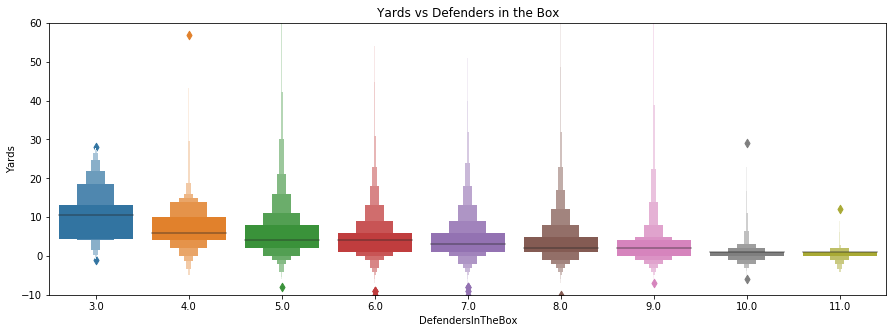

In [54]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_ylim(-10, 60)
sns.boxenplot(x='DefendersInTheBox',
               y='Yards',
               data=nfl.query('DefendersInTheBox > 2'),
               ax=ax)
plt.title('Yards vs Defenders in the Box')
plt.show()

/Users/wmchale/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


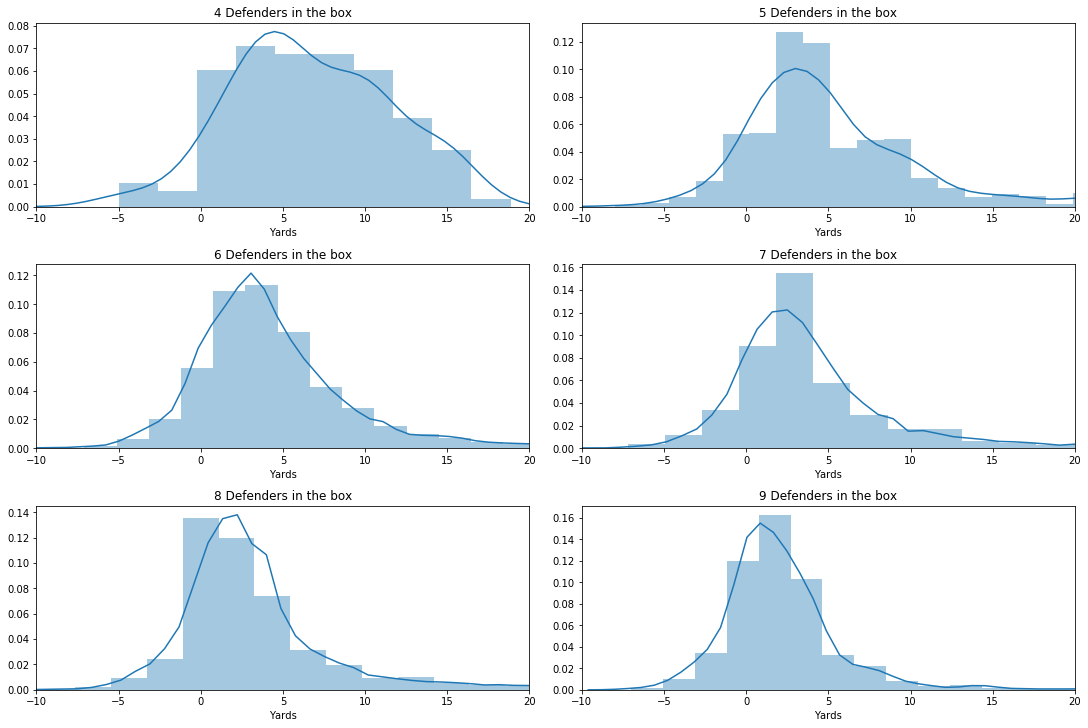

In [55]:
fig, axes = plt.subplots(3, 2, constrained_layout=True, figsize=(15 , 10))
#fig.tight_layout()
ax_idx = 0
ax_idx2 = 0
for i in range(4, 10):
    this_ax = axes[ax_idx2][ax_idx]
    #print(ax_idx, ax_idx2)
    sns.distplot(nfl.query('DefendersInTheBox == @i')['Yards'],
                ax=this_ax,
                )
    this_ax.set_title(f'{i} Defenders in the box')
    this_ax.set_xlim(-10, 20)
    ax_idx += 1
    if ax_idx == 2:
        ax_idx = 0
        ax_idx2 += 1
plt.show()

In [68]:
personnel = nfl.groupby(['OffensePersonnel', 'DefensePersonnel']).Yards.describe()


In [207]:
personnel[((personnel['mean'] > 6) | (personnel['mean'] < 2)) & (personnel['count'] >10)].sort_values('mean')

count      mean        std  min  25%  50%  \
OffensePersonnel DefensePersonnel                                              
12               5-3-3              11.0  0.272727   1.555050 -3.0  0.0  0.0   
11               5-3-3              24.0  0.708333   1.398109 -3.0  0.0  1.0   
13               4-4-3              38.0  0.763158   2.614246 -6.0  0.0  1.0   
11               4-4-3              44.0  0.840909   1.940309 -4.0  0.0  1.0   
22               5-3-3              43.0  1.209302   2.252598 -5.0  0.0  1.0   
                 4-4-3             103.0  1.543689   3.940182 -6.0  0.0  1.0   
13               5-3-3              19.0  1.578947   2.479153 -2.0  0.0  1.0   
11               5-2-4              15.0  6.066667   7.235495 -1.0  2.5  4.0   
10               2-4-5              20.0  8.600000  15.682374  0.0  4.0  5.0   

                                    75%   max  
OffensePersonnel DefensePersonnel              
12               5-3-3             1.00   3.0  
11               5-3-3             1.00   5.0  
13               4-4-3             2.00   8.0  
11               4-4-3             1.00   8.0  
22               5-3-3             2.00   8.0  
                 4-4-3             2.00  30.0  
13               5-3-3             3.50   7.0  
11               5-2-4             7.50  29.0  
10               2-4-5             6.25  74.0

In [72]:


formation = nfl.groupby(['OffenseFormation', 'DefensePersonnel']).Yards.describe()

In [212]:
formation[((formation['mean'] > 6) | (formation['mean'] < 2)) & (formation['count'] >10)].sort_values('mean', ascending=False)

count      mean        std  min   25%  50%  \
OffenseFormation DefensePersonnel                                               
I_FORM           4-1-6              12.0  8.000000  10.063435  0.0  1.75  5.0   
PISTOL           4-1-6              17.0  6.470588  10.253765 -2.0  2.00  3.0   
SINGLEBACK       5-3-3              17.0  1.411765   2.152290 -1.0  0.00  1.0   
JUMBO            4-2-5             206.0  0.805825   2.083891 -4.0  0.00  1.0   
                 4-4-3              92.0  0.641304   1.884474 -6.0  0.00  1.0   
                 5-3-3              53.0  0.528302   1.264968 -3.0  0.00  1.0   

                                   75%   max  
OffenseFormation DefensePersonnel             
I_FORM           4-1-6             9.5  36.0  
PISTOL           4-1-6             6.0  43.0  
SINGLEBACK       5-3-3             3.0   8.0  
JUMBO            4-2-5             1.0  16.0  
                 4-4-3             1.0  10.0  
                 5-3-3             1.0   5.0

The above dataframe groups by offense formation and defense personnel and filters for combinations when the resulting average play results in either a gain of 6 yards or a gain of under two yards. This information could be used by a coaching staff to evaluate play calling. For instance, if you are an offensive coordinator and you see the defense in a 4-1-6 personnel group, it would make sense to call a play putting the offense in either i-formation or pistol. 

In [65]:
nfl.groupby('Turf').Yards.describe()
#Average yards gained is about the same on artificial turf versus grass. 

,count,mean,std,min,25%,50%,75%,max
Turf,,,,,,,,
Artificial,10340.0,4.234720,6.481631,-12.0,1.0,3.0,6.0,97.0
Natural,12831.0,4.194295,6.399731,-14.0,1.0,3.0,6.0,99.0


# Feature Engineering and data prepping for modeling

In [76]:
nfl['yards_remaining_to_first'] = nfl['Distance'] - nfl['Yards']

In [78]:
def first_down(col):
    if col > 0:
        return 0
    else:
        return 1

Creating a new column to show whether the result of the play was a first down. A value of 1 indidicates that the play resulted in first down. 

In [79]:
nfl['first_down'] = nfl['yards_remaining_to_first'].apply(first_down) 

In [80]:
nfl['Team'] = nfl['Team'].map({'home':1, 'away': -1})
#Changing to numeric value to be able to calculate whether team is winning or losing.

In [81]:
nfl.head()

,Team,S,A,Dis,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,...,VisitorTeamAbbr,Week,Stadium,Location,Turf,Temperature,Humidity,home_team_lead,yards_remaining_to_first,first_down
18,1,3.63,3.35,0.38,2543773,James White,28,2017,35,1,...,KC,1,Gillette Stadium,"Foxborough, MA",Artificial,63.0,77.0,0,-6,1
40,1,3.06,2.41,0.34,2543773,James White,28,2017,43,1,...,KC,1,Gillette Stadium,"Foxborough, MA",Artificial,63.0,77.0,0,7,0
62,1,5.77,2.42,0.60,2543773,James White,28,2017,35,1,...,KC,1,Gillette Stadium,"Foxborough, MA",Artificial,63.0,77.0,0,5,0
84,1,4.45,3.20,0.46,2539663,Mike Gillislee,35,2017,2,1,...,KC,1,Gillette Stadium,"Foxborough, MA",Artificial,63.0,77.0,0,0,1
98,-1,3.90,2.53,0.44,2557917,Kareem Hunt,27,2017,25,1,...,KC,1,Gillette Stadium,"Foxborough, MA",Artificial,63.0,77.0,7,3,0


In [82]:
nfl['score_diff'] = nfl['home_team_lead'] * nfl['Team'] 
#Created new feature to indicate whether ball carrier's team is winning or losing. 
#Positive number means team is ahead. 

Created new feature to indicate whether ball carrier's team is winning or losing. 
Positive number means team is ahead. 

In [83]:
nfl.columns

Index(['Team', 'S', 'A', 'Dis', 'NflId', 'DisplayName', 'JerseyNumber',
       'Season', 'YardLine', 'Quarter', 'GameClock', 'PossessionTeam', 'Down',
       'Distance', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'Yards',
       'PlayerHeight', 'PlayerWeight', 'Position', 'HomeTeamAbbr',
       'VisitorTeamAbbr', 'Week', 'Stadium', 'Location', 'Turf', 'Temperature',
       'Humidity', 'home_team_lead', 'yards_remaining_to_first', 'first_down',
       'score_diff'],
      dtype='object')

In [84]:
nfl.drop(['yards_remaining_to_first', 'home_team_lead'], axis=1, inplace=True)

To prepare for modeling, I am creating dummy variable dataframe for the categorical variables

In [86]:
nfl.OffensePersonnel.head()

18    11
40    11
62    11
84    22
98    13
Name: OffensePersonnel, dtype: object

In [87]:
off_pers = pd.get_dummies(nfl['OffensePersonnel'], prefix= 'OP')

In [88]:
off_form = pd.get_dummies(nfl['OffenseFormation'], prefix= 'OF')

In [89]:
defen_pers = pd.get_dummies(nfl['DefensePersonnel'], prefix= 'DP')

In [90]:
down = pd.get_dummies(nfl['Down'], prefix= 'Down')

In [91]:
quarter = pd.get_dummies(nfl['Quarter'], prefix ='Quarter')

In [92]:
nfl.columns

Index(['Team', 'S', 'A', 'Dis', 'NflId', 'DisplayName', 'JerseyNumber',
       'Season', 'YardLine', 'Quarter', 'GameClock', 'PossessionTeam', 'Down',
       'Distance', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'Yards',
       'PlayerHeight', 'PlayerWeight', 'Position', 'HomeTeamAbbr',
       'VisitorTeamAbbr', 'Week', 'Stadium', 'Location', 'Turf', 'Temperature',
       'Humidity', 'first_down', 'score_diff'],
      dtype='object')

In [93]:
nfl_model = nfl[['Yards','S', 'A', 'Dis', 'Distance', 'DefendersInTheBox', 'PlayerWeight', 'first_down', 'score_diff']]

In [94]:
nfl_model.head()

,Yards,S,A,Dis,Distance,DefendersInTheBox,PlayerWeight,first_down,score_diff
18,8,3.63,3.35,0.38,2,6.0,205,1,0
40,3,3.06,2.41,0.34,10,6.0,205,0,0
62,5,5.77,2.42,0.60,10,7.0,205,0,0
84,2,4.45,3.20,0.46,2,9.0,210,1,0
98,7,3.90,2.53,0.44,10,7.0,216,0,-7


In [95]:
nfl_model = pd.concat([nfl_model, off_pers], axis=1)

In [96]:
nfl_model = pd.concat([nfl_model, off_form], axis=1)

In [97]:
nfl_model = pd.concat([nfl_model, defen_pers], axis=1)

In [98]:
nfl_model = pd.concat([nfl_model, down], axis=1)

In [99]:
nfl_model = pd.concat([nfl_model, quarter], axis=1)

In [100]:
nfl_model.columns

Index(['Yards', 'S', 'A', 'Dis', 'Distance', 'DefendersInTheBox',
       'PlayerWeight', 'first_down', 'score_diff', 'OP_01', 'OP_10', 'OP_11',
       'OP_12', 'OP_13', 'OP_20', 'OP_21', 'OP_22', 'OP_30', 'OF_ACE',
       'OF_EMPTY', 'OF_I_FORM', 'OF_JUMBO', 'OF_PISTOL', 'OF_SHOTGUN',
       'OF_SINGLEBACK', 'OF_WILDCAT', 'DP_2-3-6', 'DP_2-4-5', 'DP_3-2-6',
       'DP_3-3-5', 'DP_3-4-4', 'DP_4-1-6', 'DP_4-2-5', 'DP_4-3-4', 'DP_4-4-3',
       'DP_5-2-4', 'DP_5-3-3', 'Down_1', 'Down_2', 'Down_3', 'Down_4',
       'Quarter_1', 'Quarter_2', 'Quarter_3', 'Quarter_4', 'Quarter_5'],
      dtype='object')

In [101]:
nfl_model.head()

,Yards,S,A,Dis,Distance,DefendersInTheBox,PlayerWeight,first_down,score_diff,OP_01,...,DP_5-3-3,Down_1,Down_2,Down_3,Down_4,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Quarter_5
18,8,3.63,3.35,0.38,2,6.0,205,1,0,0,...,0,0,0,1,0,1,0,0,0,0
40,3,3.06,2.41,0.34,10,6.0,205,0,0,0,...,0,1,0,0,0,1,0,0,0,0
62,5,5.77,2.42,0.60,10,7.0,205,0,0,0,...,0,1,0,0,0,1,0,0,0,0
84,2,4.45,3.20,0.46,2,9.0,210,1,0,0,...,0,0,1,0,0,1,0,0,0,0
98,7,3.90,2.53,0.44,10,7.0,216,0,-7,0,...,0,1,0,0,0,1,0,0,0,0


In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score



features = ['S', 'A', 'Dis', 'Distance', 'DefendersInTheBox',
       'PlayerWeight', 'score_diff',
       'OP_01', 'OP_10', 'OP_11', 'OP_12', 'OP_13', 'OP_20', 'OP_21', 'OP_22',
       'OP_30', 'OF_ACE', 'OF_EMPTY', 'OF_I_FORM', 'OF_JUMBO', 'OF_PISTOL',
       'OF_SHOTGUN', 'OF_SINGLEBACK', 'OF_WILDCAT', 'DP_2-3-6', 'DP_2-4-5',
       'DP_3-2-6', 'DP_3-3-5', 'DP_3-4-4', 'DP_4-1-6', 'DP_4-2-5', 'DP_4-3-4',
       'DP_4-4-3', 'DP_5-2-4', 'DP_5-3-3', 'Down_1', 'Down_2', 'Down_3',
       'Down_4', 'Quarter_1', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Quarter_5']



In [104]:
X_log = nfl_model[features] 

y_log= nfl_model['first_down']

In [107]:


logreg = LogisticRegression()



In [108]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, random_state= 99)

In [109]:
logreg.fit(X_train_log, y_train_log)

preds_log = logreg.predict(X_test_log)

/Users/wmchale/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [111]:
from sklearn.metrics import accuracy_score


score = accuracy_score(preds_log, y_test_log)
print(score)


0.8211634731572588


In [112]:
nfl_model.first_down.value_counts()

0    18271
1     4900
Name: first_down, dtype: int64

In [113]:
baseline = 18271/23171
print(baseline)

0.7885287644037806


In [114]:
np.mean(cross_val_score(logreg, X_train_log, y_train_log, cv=10))


/Users/wmchale/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wmchale/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wmchale/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wmchale/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wmchale/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

0.829727523811606

Using a logistic regression, the model is able to predict whether the play will result in a first down with ~83% accuracy vs baseline of 78.8%.  

In [115]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100, max_features=10)

clf.fit(X_train_log,y_train_log)

y_pred_rf=clf.predict(X_test_log)


In [116]:
print("Accuracy:",metrics.accuracy_score(y_test_log, y_pred_rf))


Accuracy: 0.82168133954773


In [117]:
np.mean(cross_val_score(clf, X_train_log, y_train_log, cv=10))


0.83007225133873

Using a random forest, the model generates slightly better accuracy versus logistic regression and about 5% better than the baseline. 

In [118]:
feature_imp = pd.Series(clf.feature_importances_,index=nfl_model[features].columns).sort_values(ascending=False)


No handles with labels found to put in legend.


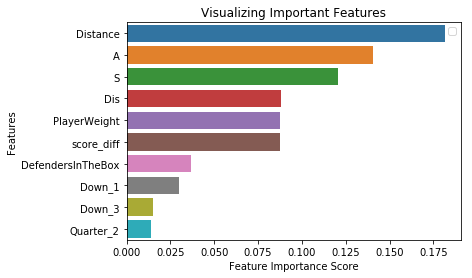

In [119]:
feature_imp.head(10)

# Creating a bar plot
sns.barplot(x=feature_imp.head(10), y=feature_imp.head(10).index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Building a 3rd down-only model

In [120]:
third_down = nfl_model[nfl_model.Down_3 == 1]

In [121]:
third_down.shape


(1814, 46)

In [122]:
X_3 = third_down[features]

y_3 = third_down['first_down']



In [143]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state = 99)

In [144]:
clf3=RandomForestClassifier(n_estimators=100, max_features=10)

clf3.fit(X_train_3,y_train_3)

y_pred_rf_3=clf.predict(X_test_3)



In [239]:
third_down_accuracy = metrics.accuracy_score(y_test_3, y_pred_rf_3)
print("Accuracy:",metrics.accuracy_score(y_test_3, y_pred_rf_3))



Accuracy: 0.9118942731277533


In [138]:
third_down.first_down.value_counts()


0    928
1    886
Name: first_down, dtype: int64

In [139]:
#Baseline equals 928/1814
baseline = 928/1814

0.5115766262403528

Using a random forest model results in an accuracy rate of 91%, significantly outperforming the baseline of 51%

In [148]:
feature_imp_3 = pd.Series(clf3.feature_importances_,index=nfl_model[features].columns).sort_values(ascending=False)


No handles with labels found to put in legend.


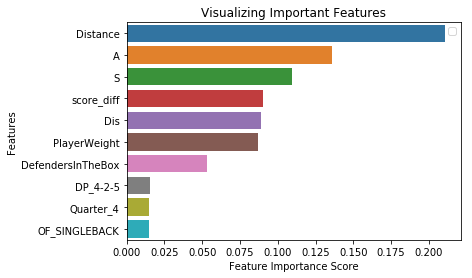

In [151]:
feature_imp_3.head(10)

# Creating a bar plot
sns.barplot(x=feature_imp_3.head(10), y=feature_imp_3.head(10).index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [203]:
#Running a loop through the predict prob method to see how different values of distance to go impact predictions
first_down_prob = []
for i in range(1,20):
    p = clf3.predict_proba([[4.025, 2.62, 0.43, i, 7, 217, 2.2, 
                         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                         0,0,0,0,0,0,0,0,0,0,0,0]])
    first_down_prob.append(p)
    first_down_prob.append(i)
    
    

In [215]:
first_down_prob[0:20]

[array([[0.19, 0.81]]),
 1,
 array([[0.35, 0.65]]),
 2,
 array([[0.44, 0.56]]),
 3,
 array([[0.52, 0.48]]),
 4,
 array([[0.64, 0.36]]),
 5,
 array([[0.92, 0.08]]),
 6,
 array([[0.94, 0.06]]),
 7,
 array([[0.94, 0.06]]),
 8,
 array([[0.94, 0.06]]),
 9,
 array([[0.95, 0.05]]),
 10]

The probability of running for a first down on 3rd down drops dramatically once the distance moves past 4-5 yards. 

In [185]:
third_down['first_down_pred_prob'] = clf3.predict_proba(X_3)[:, 1]

/Users/wmchale/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [187]:
third_down.head()


,Yards,S,A,Dis,Distance,DefendersInTheBox,PlayerWeight,first_down,score_diff,OP_01,...,Down_1,Down_2,Down_3,Down_4,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Quarter_5,first_down_pred_prob
18,8,3.63,3.35,0.38,2,6.0,205,1,0,0,...,0,0,1,0,1,0,0,0,0,0.85
128,10,3.32,2.76,0.44,7,5.0,205,1,7,0,...,0,0,1,0,1,0,0,0,0,0.76
326,0,2.39,1.68,0.31,1,7.0,205,0,0,0,...,0,0,1,0,1,0,0,0,0,0.58
1132,3,3.33,2.25,0.35,1,8.0,216,1,15,0,...,0,0,1,0,0,0,0,1,0,0.71
1354,23,3.48,3.26,0.43,3,6.0,210,1,0,0,...,0,0,1,0,0,1,0,0,0,0.78


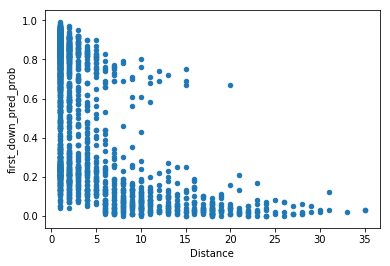

In [242]:
third_down.plot(kind='scatter', x='Distance', y='first_down_pred_prob')

The above graph shows that as distance increases, the model assigns lower and lower probability to the team achieving a first down.

In [227]:
probs = third_down.groupby('Distance').first_down_pred_prob.describe()

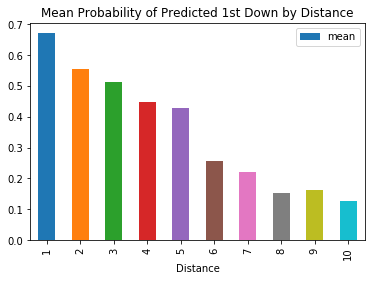

In [245]:
probs.head(10).reset_index().plot(kind='bar', x='Distance', y='mean', title='Mean Probability of Predicted 1st Down by Distance')

Probability of first down drops as the distance increases, with a particularly sharp drop between 5 and 6 yards

In [243]:
actual = third_down.groupby('Distance').first_down.describe()

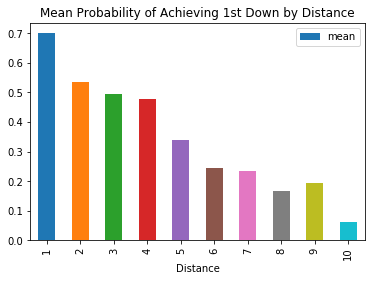

In [244]:
actual.head(10).reset_index().plot(kind='bar', x='Distance', y='mean', title='Mean Probability of Achieving 1st Down by Distance')

Actual proportion of achieving a first down by distance - pretty similar to the model except the large drop in % comes between 4 and 5 versus 5 and 6 in the model. 